# Introduction générale

La visualisation de données de grande dimension est un problème important dans de nombreux domaines différents, et traite des données de dimensionnalité très variable. Noyaux cellulaires pertinents pour le cancer du sein, par exemple, sont décrites par environ 30 variables (Street et al., 1993). Au cours des dernières décennies, diverses techniques de visualisation de ces données de grande dimension ont été proposées. Les techniques importantes comprennent les affichages iconographiques tels que les visages de Chernoff (Chernoff, 1973), les techniques basées sur les pixels (Keim, 2000) et les techniques qui représentent les dimensions des données sous forme de sommets dans un graphe (Battista et al., 1994). La plupart de ces Les techniques fournissent simplement des outils pour afficher plus de deux dimensions de données et laissent l'interprétation des données à l'observateur humain. Cela limite considérablement l'applicabilité de ces techniques à l'ensemble de données du monde réel contenant des milliers de points de données de grande dimension.
Ainsi, il existe un moyen de convertir un ensemble de données de grande dimension en une matrice de paires
Nous allons présenter une des techniques, appelée __t-SNE__, pour visualiser les données de similarité résultantes. 

# Définition 

__t-SNE__(-distributed Stochastic Neighbor Embedding) est une technique de réduction de dimension utilisée en exploration de
données de grandes dimensions développée en 2008 par Geoffrey Hinton et
Laurens van der Maaten. Comme pour l’ACP (Analyse de Composante Principale ), l’objectif est __de déterminer un
espace de plus petite dimension tout en préservant les distances entre les
points__.

Avant de parler de __t-SNE__, commençons par comprendre ce qu'est  __SNE__(Stochastic Neighbor Embedding). En effet, SNE est un algorithme qui essaie de placer les objets dans un espace de faible dimension afin de préserver au mieux l'identité de leur emplacement.

# Stochastic Neighbor Embedding

__Stochastic Neighbor Embedding__
commence par convertir les distances euclidiennes de grande dimension entre les points de données en probabilités conditionnelles qui représentent les similarités
. La similarité
du point de données $$x_j$$ au point de données $$x_i$$
est la probabilité conditionnelle, $$p(j|i)$$
, que $$x_i$$ choisirait $$x_j$$ comme son voisin si les voisins étaient choisis proportionnellement à leur densité de probabilité sous une gaussienne centrée en
$$x_{ii}$$
. Pour les points de données proches, $$p(j/i)$$
est relativement élevé, alors que pour des points de données largement séparés, $$p(j/i)$$ sera
être presque infinitésimal (pour des valeurs raisonnables de la variance de la gaussienne, $$\sigma_i$$. Mathématiquement,
la probabilité conditionnelle $$p(j/i)$$
est donné par

$$
P(j/i)=  \frac{\exp({-\left\lVert\ x_i - x_j\right\rVert\ ^2} \big/2\sigma_i²)}{\sum_{k \ne i}\exp(-\left\lVert\ x_i - x_j\right\rVert\ ^2 \big/ {2\sigma_i²)} } \quad  \quad \quad \quad \quad \quad  \quad \quad Equation(1)
$$




où __σi__
est la variance de la gaussienne centrée sur le point de données __xi__
. La méthode pour déterminer
la valeur de σi
est présenté plus loin dans cette section. Parce que nous ne sommes intéressés que par la modélisation par paires
similitudes, nous fixons la valeur de __pi|i__
à zéro

Pour les homologues de faible dimension __yi__ et __yj__ du
points de données de grande dimension __xi__ et __xj__ , il est possible de calculer une probabilité conditionnelle similaire,
que nous notons __q(j|i)__ . Nous fixons la variance de la gaussienne utilisée dans le calcul
des probabilités conditionnelles __q(j|i)__ à __1/√12__ .
Par conséquent, nous modélisons la similarité du point de la carte __yj__ à la carte
pointe __yi__ par

$$
q(j/i)=  \frac{\exp({-\left\lVert\ y_i - y_j\right\rVert\ ^2})}{\sum_{k \ne i}\exp(-\left\lVert\ y_i - y_k\right\rVert\ ^2)}
$$


Encore une fois, puisque nous ne sommes intéressés que par la modélisation des similarités par paires, nous posons __q(i/i)__ = 0.
Si la carte pointe __yi__ et __yj__, modélisons correctement la similarité entre les données de grande dimension.
points __xi__ et __xj__ , les probabilités conditionnelles __p(j|i)__ et __q(j|i)__ seront égales. Motivé par ce constat
tion, __SNE__ vise à trouver une représentation de données de faible dimension qui minimise l'inadéquation entre
__p(j|i)__ et __q(j|i)__ . Une mesure naturelle de la fidélité avec laquelle __q(j|i) modélise __p(j|i)__ est le __Kullback-
Divergence de Leibler__ (qui est dans ce cas égale à l'entropie croisée à une constante additive près).La fonction de coût __C__ est donnée par :

$$
C= \sum_{i}{KL}(P_i||Q_i)=\sum_{i}\sum_{j}p(j/i)\log {\frac{p(i/j)}{q(j/i)}} \quad  \quad \quad \quad \quad \quad  \quad \quad Equation(2) 
$$
Dans cette function, __Pi__ représente la distribution de probabilité conditionnelle sur tous les autres points de données donnés-
point __xi__ , et __Qi__ représente la distribution de probabilité conditionnelle sur tous les autres points de la carte donnés
carte point __yi__ . Parce que la divergence de __Kullback-Leibler__ n'est pas symétrique, différents types d'erreur
dans les distances par paires dans la carte de faible dimension ne sont pas pondérées de manière égale.
En particulier, il y est un coût important pour l'utilisation de points de carte largement séparés pour représenter des points de données à proximité

SNE effectue une recherche binaire de la valeur de sur la variance __σi__ qui
produit un __Pi__ avec une perplexité fixe qui est spécifiée. La perplexité est définie comme :

$$
Perp(P_i)=2^{H(p_i)}
$$

où H(Pi ) est l'entropie de Shannon de Pi avec :
$$
H(P_i)=-\sum_{j}p(j/i)\log_2(P(j/i) 
$$
les performances de SNE sont assez robustes aux changements de perplexité, et les valeurs typiques se situent entre 5
et 50

La minimisation de la __fonction de coût__ dans l'équation 2 est effectuée à l'aide de la méthode __Gradient Descent__.

$$
\frac{\partial C}{\partial y_i} = 2\sum_{j}(p(j/i)-q(j/i)+p(i/j)-q(i/j)(y_i-y_j)
$$



# 3. t-Distributed Stochastic Neighbor Embedding

__t-Distributed Stochastic Neighbor Embedding (t-SNE)__ est une technique non supervisée et non linéaire principalement utilisée pour l’exploration, la visualisation et la réduction des dimensions de données de haute dimension. En d'autres mots, le rôle de cet algorithme est la réduction de la dimensionnalité non linéaire. Cela signifie qu'il permet de séparer les données qui ne peuvent pas être séparées par une ligne droite. Il donne une idée ou une intuition de la façon dont les données sont organisées dans un espace de grande dimension et par conséquent, il produit des groupes séparés et bien définis. Une fois, on a compris ses données, t-SNE se charge de les compresser en les projetant dans un espace de faible dimension __(2D ou 3D)__.

## 3.1. Algorithme de Kernel t-SNE

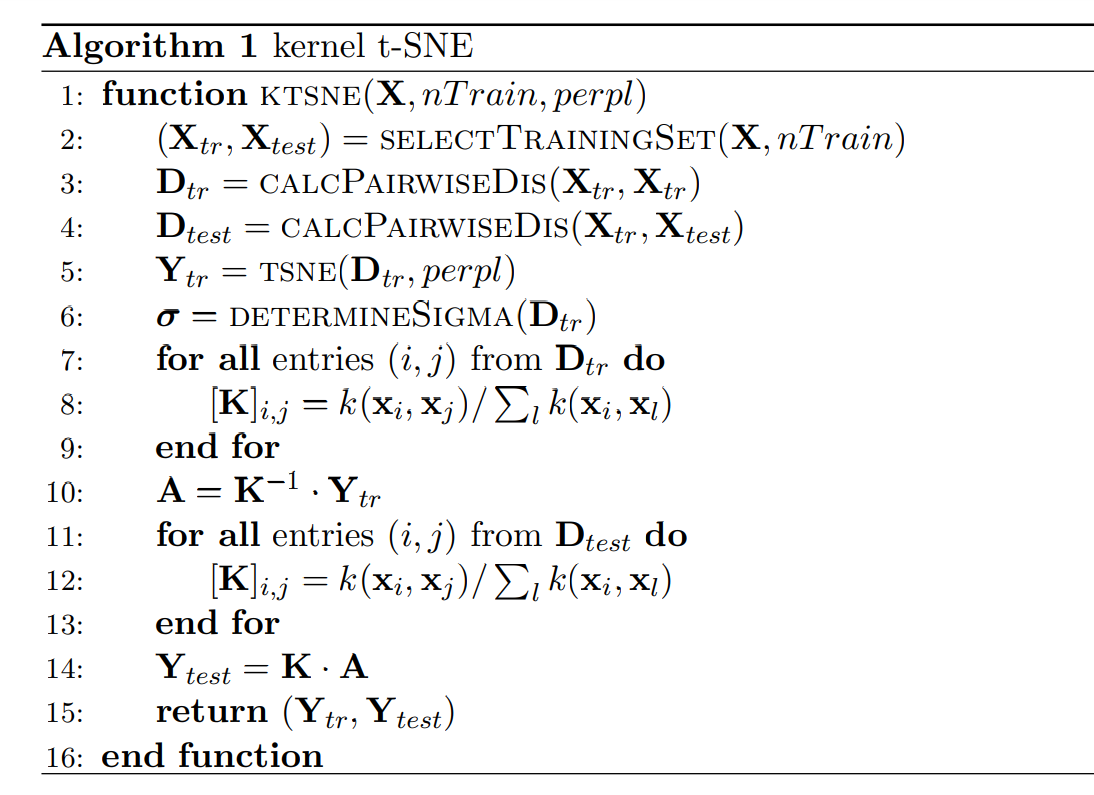

# 3.2 Quand et comment utiliser le t-SNE ?


Le t-SNE est un algorithme très intelligent qui permet d'éviter le sur-apprentissage et de simplifier les données. Il s'adapte à des situations de réductions de dimensions précises.    

- Cet algorithme gère efficacement et intelligemment les données non linéaires et les données qui présentent des valeurs aberrantes ou extrêmes contrairement à L'ACP qui est un algorithme linéaire.
- Il faut faire attention à ne pas utiliser le t-SNE avec des jeux de données volumineux, parce qu'il implique beaucoup de calculs. Il est particulièrement lent et gourmand en matière de puissance de calcul
- Il peut être utilisé pour comprendre et interpréter les réseaux de neurones convolutifs (CNN) qui sont généralement des boites noires. Comment faire cela ? Il suffit de visualiser les sorties de certaines couches et les visualiser, cela aide beaucoup à comprendre ce qui se passe à l’intérieur du réseau.
- Le t-SNE est non déterministe, parfois, on n’obtiendra pas exactement la même sortie chaque fois qu'on l’exécute, bien que les résultats sont susceptibles d’être similaires. Il est donc efficace pour comprendre et décortiquer des données complexes, mais pas vraiment pour l'entrainement des modèles Machine Learning puisqu'il peut changer de résultats d'une exécution à une autre.
- Il peut être utilisé pour comprendre et interpréter les réseaux de neurones convolutifs (CNN) qui sont généralement des boites noires. Il suffit de visualiser les sorties de certaines couches et les visualiser, cela aide beaucoup à comprendre ce qui se passe à l’intérieur du réseau.


# 3.3 Avantages de t-SNE

- L'un des principaux avantages de t-sne est qu'il préserve les emplacements locaux dans les données. Cela signifie que les observations proches les unes des autres dans l'espace des caractéristiques en entrée doivent également être proches les unes des autres dans l'espace des caractéristiques transformées. C'est pourquoi t-SNE est un excellent outil pour des tâches telles que la visualisation de données de grande dimension dans un espace de dimension inférieure. Les points qui étaient adjacents dans les espaces de grande dimension doivent également être proches les uns des autres dans l'espace de faible dimension

- Un autre avantage de t-SNE est qu'il ne fait pas beaucoup d'hypothèses sur la façon dont les caractéristiques de vos données sont liées. Cela signifie qu'il convient de l'utiliser dans les situations où les entités de vos données ne sont pas liées de manière linéaire.

- En général, les résultats t-SNE ne sont pas déformés par les valeurs aberrantes aussi facilement que les résultats de certaines autres techniques de réduction de dimension.


# 3.3 Désavantages du t-SNE

- Relativement lent. L'un des principaux inconvénients de t-SNE est qu'il est gourmand en calculs et donc relativement lent. Cela signifie qu'il n'est pas approprié pour de très grands ensembles de données avec de nombreuses observations. Cela s'explique en partie par le fait que les distances par paires doivent être calculées entre tous les points de l'ensemble de données.
- Pas génial pour les fonctionnalités de prétraitement pour la prédiction. t-SNE n'est généralement pas aussi bon pour les fonctionnalités de prétraitement qui vont être introduites dans un mode prédictif que d'autres modèles comme ACP(Analyse de Composante Principale ). Lorsque vous formez un modèle t-sne sur un jeu de données, il se concentre uniquement sur les détails spécifiques des observations dans ce jeu de données particulier. Il n'apprend pas une fonction générale qui peut être appliquée efficacement à des données invisibles lorsque, par exemple, vous recevez de nouvelles observations sur lesquelles vous souhaitez faire des prédictions.
- A des hyperparamètres. Un autre inconvénient de t-sne est qu'il a des hyperparamètres qui doivent être réglés correctement pour que le modèle fonctionne bien. Cela signifie que vous devez suivre quelques étapes supplémentaires pour vous assurer que ces paramètres sont définis de manière appropriée.


# Représentation du t-SNE

Pour mieux apprehender ce qu'on a décrit en théorie, concentrons nous sur les cas pratiques.

# Cas 1 : t-SNE from Scratch (ft. NumPy)

Le meilleur de comprendre un algorithme est de le codel "from scratch". Bien qu'il existe de bibliothèques déjà conçues. Nous allons donc reprendre les formules que nous avons vu et les appliquer au langage python

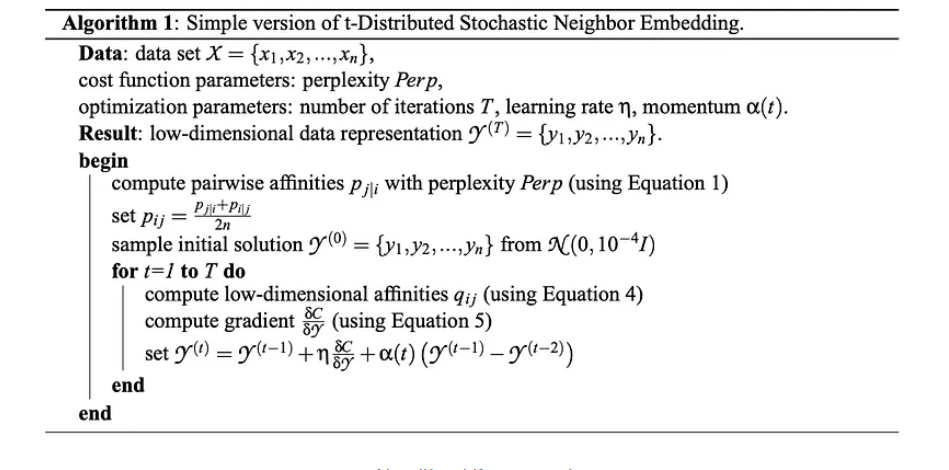

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd

# Fetch MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_total = pd.DataFrame(mnist["data"])
y_total = pd.DataFrame(mnist["target"])

X_reduced = X_total.sample(n=1000)
y_reduced = y_total.loc[X_total.index]

# PCA to keep 30 components
X = PCA(n_components=30).fit_transform(X_reduced) 


/home/fouba/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Codons la formule de la probabilité de l'équation (1)

 
$$
P(j/i)=  \frac{\exp({-\left\lVert\ x_i - x_j\right\rVert\ ^2} \big/2\sigma_i²)}{\sum_{k \ne i}\exp(-\left\lVert\ x_i - x_j\right\rVert\ ^2 \big/ {2\sigma_i²)} } \quad  \quad \quad \quad \quad \quad  \quad \quad Equation(1)
$$



In [12]:
def get_original_pairwise_affinities(X:np.array([]), 
                                     perplexity=10):

    '''
    Function to obtain affinities matrix.
    '''

    n = len(X)

    print("Computing Pairwise Affinities....")

    p_ij = np.zeros(shape=(n,n))
    for i in range(0,n):
        
        # Equation 1 numerator
        diff = X[i]-X
        σ_i = grid_search(diff, i, perplexity) # Grid Search for σ_i
        norm = np.linalg.norm(diff, axis=1)
        p_ij[i,:] = np.exp(-norm**2/(2*σ_i**2))

        # Set p = 0 when j = i
        np.fill_diagonal(p_ij, 0)
        
        # Equation 1 
        p_ij[i,:] = p_ij[i,:]/np.sum(p_ij[i,:])

    # Set 0 values to minimum numpy value (ε approx. = 0) 
    ε = np.nextafter(0,1)
    p_ij = np.maximum(p_ij,ε)

    print("Completed Pairwise Affinities Matrix. \n")

    return p_ij

# La fonction de la recherche : cas de perplexité

La perplexité a pour formule :
$$
Perp(P_i)=2^{H(p_i)}
$$

Voici donc son code :

In [13]:
def grid_search(diff_i, i, perplexity):

    '''
    Helper function to obtain σ's based on user-specified perplexity.
    '''

    result = np.inf # Set first result to be infinity

    norm = np.linalg.norm(diff_i, axis=1)
    std_norm = np.std(norm) # Use standard deviation of norms to define search space

    for σ_search in np.linspace(0.01*std_norm,5*std_norm,200):

        # Equation 1 Numerator
        p = np.exp(-norm**2/(2*σ_search**2)) 

        # Set p = 0 when i = j
        p[i] = 0 

        # Equation 1 (ε -> 0) 
        ε = np.nextafter(0,1)
        p_new = np.maximum(p/np.sum(p),ε)
        
        # Shannon Entropy
        H = -np.sum(p_new*np.log2(p_new))
        
        # Get log(perplexity equation) as close to equality
        if np.abs(np.log(perplexity) - H * np.log(2)) < np.abs(result):
            result = np.log(perplexity) - H * np.log(2)
            σ = σ_search
    
    return σ

In [14]:
p_ij = get_original_pairwise_affinities(X)
p_ij

Computing Pairwise Affinities....


/tmp/ipykernel_5107/1185958734.py:22: RuntimeWarning: invalid value encountered in divide
  p_new = np.maximum(p/np.sum(p),ε)


Completed Pairwise Affinities Matrix. 



array([[4.94065646e-324, 5.24960216e-008, 7.43424584e-006, ...,
        1.05241251e-004, 3.48715920e-005, 1.36888044e-004],
       [6.76882280e-007, 4.94065646e-324, 6.91091054e-006, ...,
        6.35128536e-006, 1.72487117e-007, 1.54188639e-004],
       [4.31289349e-014, 8.62857999e-017, 4.94065646e-324, ...,
        2.05899405e-005, 4.89312806e-016, 3.70839523e-007],
       ...,
       [2.39086462e-031, 1.20772075e-046, 9.96772151e-018, ...,
        4.94065646e-324, 5.12398838e-048, 9.80071849e-018],
       [6.03780940e-006, 2.67068648e-010, 1.27404714e-007, ...,
        3.05796429e-008, 4.94065646e-324, 1.67573044e-006],
       [2.76087407e-008, 1.96377650e-009, 4.42371310e-006, ...,
        6.19798994e-005, 3.10240399e-010, 4.94065646e-324]])

# Cas de la diagonale 

Lorsque  i==j ,
$$ \epsilon \approx 0 $$
Ainsi , on retrouve cette formule : 
$$
P(ij) = \frac{P(j/i)+P(i/j)}{2n}
$$

Nous representons par cette fonction : 

In [16]:
def get_symmetric_p_ij(p_ij:np.array([])):

    '''
    Function to obtain symmetric affinities matrix utilized in t-SNE.
    '''
        
    print("Computing Symmetric p_ij matrix....")

    n = len(p_ij)
    p_ij_symmetric = np.zeros(shape=(n,n))
    for i in range(0,n):
        for j in range(0,n):
            p_ij_symmetric[i,j] = (p_ij[i,j] + p_ij[j,i]) / (2*n)
    
    # Set 0 values to minimum numpy value (ε approx. = 0)
    ε = np.nextafter(0,1)
    p_ij_symmetric = np.maximum(p_ij_symmetric,ε)

    print("Completed Symmetric p_ij Matrix. \n")

    return p_ij_symmetric


In [17]:
p_ij_symmetric = get_symmetric_p_ij(p_ij)
p_ij_symmetric

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 



array([[4.94065646e-324, 3.64689151e-010, 3.71712294e-009, ...,
        5.26206254e-008, 2.04547007e-008, 6.84578265e-008],
       [3.64689151e-010, 4.94065646e-324, 3.45545527e-009, ...,
        3.17564268e-009, 8.63770930e-011, 7.70953016e-008],
       [3.71712294e-009, 3.45545527e-009, 4.94065646e-324, ...,
        1.02949702e-008, 6.37023573e-011, 2.39727631e-009],
       ...,
       [5.26206254e-008, 3.17564268e-009, 1.02949702e-008, ...,
        4.94065646e-324, 1.52898215e-011, 3.09899497e-008],
       [2.04547007e-008, 8.63770930e-011, 6.37023573e-011, ...,
        1.52898215e-011, 4.94065646e-324, 8.38020340e-010],
       [6.84578265e-008, 7.70953016e-008, 2.39727631e-009, ...,
        3.09899497e-008, 8.38020340e-010, 4.94065646e-324]])

In [18]:
def initialization(X: np.array([]),
                   n_dimensions = 2):

    return np.random.normal(loc=0,scale=1e-4,size=(len(X),n_dimensions))

In [19]:
y0 = initialization(X)
y0

array([[ 5.06523083e-05,  1.35630047e-04],
       [-1.05928026e-04,  5.66428588e-05],
       [-2.42169896e-05,  2.46506089e-05],
       ...,
       [ 1.05420959e-05,  1.46726710e-06],
       [-4.12081436e-05, -4.91554693e-05],
       [-8.89459443e-05, -1.82261668e-05]])

# Matrice d'affinité 


Maintenant, nous voulons calculer la matrice d'affinité dans cet espace de dimension inférieure. 


$$
q(ji)=  \frac{{\bigg(1+\left\lVert\ y_i - y_j\right\rVert\ ^2}\bigg)^{-1}}{\sum_{k \ne i}{\bigg(1+\left\lVert\ y_k - y_l\right\rVert\ ^2}\bigg)^{-1}}
$$

Encore une fois, nous posons q = 0 chaque fois que i = j.
Voici sa fonction :

In [20]:
def get_low_dimensional_affinities(Y:np.array([])):
    '''
    Obtain low-dimensional affinities.
    '''

    n = len(Y)
    q_ij = np.zeros(shape=(n,n))

    for i in range(0,n):

        # Equation 4 Numerator
        diff = Y[i]-Y
        norm = np.linalg.norm(diff, axis=1)
        q_ij[i,:] = (1+norm**2)**(-1)

    # Set p = 0 when j = i
    np.fill_diagonal(q_ij, 0)

    # Equation 4 
    q_ij = q_ij/q_ij.sum()

    # Set 0 values to minimum numpy value (ε approx. = 0)
    ε = np.nextafter(0,1)
    q_ij = np.maximum(q_ij,ε)

    return q_ij

In [21]:
q_ij = get_low_dimensional_affinities(y0)
q_ij

array([[4.94065646e-324, 1.00100101e-006, 1.00100102e-006, ...,
        1.00100102e-006, 1.00100100e-006, 1.00100100e-006],
       [1.00100101e-006, 4.94065646e-324, 1.00100103e-006, ...,
        1.00100103e-006, 1.00100103e-006, 1.00100104e-006],
       [1.00100102e-006, 1.00100103e-006, 4.94065646e-324, ...,
        1.00100104e-006, 1.00100104e-006, 1.00100104e-006],
       ...,
       [1.00100102e-006, 1.00100103e-006, 1.00100104e-006, ...,
        4.94065646e-324, 1.00100104e-006, 1.00100103e-006],
       [1.00100100e-006, 1.00100103e-006, 1.00100104e-006, ...,
        1.00100104e-006, 4.94065646e-324, 1.00100104e-006],
       [1.00100100e-006, 1.00100104e-006, 1.00100104e-006, ...,
        1.00100103e-006, 1.00100104e-006, 4.94065646e-324]])

# Fonction de coût

Calculer le gradient de la fonction de coût :

$$
C= \sum_{i}{KL}(P_i||Q_i)=\sum_{i}\sum_{j}p(j/i)\log {\frac{p(i/j)}{q(j/i)}} 
$$

Sa  version minimisée est : 

$$
\frac{\partial C}{\partial y_i} = 2\sum_{j}(p(j/i)-q(j/i)+p(i/j)-q(i/j)(y_i-y_j)
$$


In [22]:
def get_gradient(p_ij: np.array([]),
                q_ij: np.array([]),
                Y: np.array([])):
    '''
    Obtain gradient of cost function at current point Y.
    '''

    n = len(p_ij)

    # Compute gradient
    gradient = np.zeros(shape=(n, Y.shape[1]))
    for i in range(0,n):

        # Equation 5
        diff = Y[i]-Y
        A = np.array([(p_ij[i,:] - q_ij[i,:])])
        B = np.array([(1+np.linalg.norm(diff,axis=1))**(-1)])
        C = diff
        gradient[i] = 4 * np.sum((A * B).T * C, axis=0)

    return gradient  

In [23]:
gradient = get_gradient(p_ij_symmetric,q_ij,y0)
gradient

array([[-2.28242375e-07,  1.36443758e-07],
       [-1.75593939e-07, -1.39725911e-07],
       [ 3.57708951e-08,  8.95567865e-08],
       ...,
       [-2.36564589e-07,  1.10181201e-07],
       [-2.71516293e-07,  3.90822670e-07],
       [ 1.68840925e-07, -1.41242620e-07]])

# Iteration & Optimisation de Low-Dimensional Mapping

$$
    \gamma^{(2)} = \gamma^{(t-1)}+\eta\frac{\partial C}{\partial \gamma}+\alpha(t)\bigg(\gamma^{(t-1)}-\gamma^{(t-2)}\bigg)
$$

Maintenant, en rassemblant nos algorithme , nous obtenons cette fonction  :

In [24]:
def tSNE(X: np.array([]), 
        perplexity = 10,
        T = 1000, 
        η = 200,
        early_exaggeration = 4,
        n_dimensions = 2):
    
    n = len(X)

    # Get original affinities matrix 
    p_ij = get_original_pairwise_affinities(X, perplexity)
    p_ij_symmetric = get_symmetric_p_ij(p_ij)
    
    # Initialization
    Y = np.zeros(shape=(T, n, n_dimensions))
    Y_minus1 = np.zeros(shape=(n, n_dimensions))
    Y[0] = Y_minus1
    Y1 = initialization(X, n_dimensions)
    Y[1] = np.array(Y1)

    print("Optimizing Low Dimensional Embedding....")
    # Optimization
    for t in range(1, T-1):
        
        # Momentum & Early Exaggeration
        if t < 250:
            α = 0.5
            early_exaggeration = early_exaggeration
        else:
            α = 0.8
            early_exaggeration = 1

        # Get Low Dimensional Affinities
        q_ij = get_low_dimensional_affinities(Y[t])

        # Get Gradient of Cost Function
        gradient = get_gradient(early_exaggeration*p_ij_symmetric, q_ij, Y[t])

        # Update Rule
        Y[t+1] = Y[t] - η * gradient + α * (Y[t] - Y[t-1]) # Use negative gradient 

        # Compute current value of cost function
        if t % 50 == 0 or t == 1:
            cost = np.sum(p_ij_symmetric * np.log(p_ij_symmetric / q_ij))
            print(f"Iteration {t}: Value of Cost Function is {cost}")

    print(f"Completed Embedding: Final Value of Cost Function is {np.sum(p_ij_symmetric * np.log(p_ij_symmetric / q_ij))}")
    solution = Y[-1]

    return solution, Y


In [25]:
solution, Y = tSNE(X)



Computing Pairwise Affinities....


/tmp/ipykernel_5107/1185958734.py:22: RuntimeWarning: invalid value encountered in divide
  p_new = np.maximum(p/np.sum(p),ε)


Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 4.441259493024902
Iteration 50: Value of Cost Function is 2.6462331883866157
Iteration 100: Value of Cost Function is 2.365644947528324
Iteration 150: Value of Cost Function is 2.3068186584032935
Iteration 200: Value of Cost Function is 2.283770015043663
Iteration 250: Value of Cost Function is 2.24557348846227
Iteration 300: Value of Cost Function is 1.2193430240020788
Iteration 350: Value of Cost Function is 1.133942200485162
Iteration 400: Value of Cost Function is 1.1062542589855953
Iteration 450: Value of Cost Function is 1.0933824929934386
Iteration 500: Value of Cost Function is 1.0854844742851857
Iteration 550: Value of Cost Function is 1.0800291202528312
Iteration 600: Value of Cost Function is 1.0759959253948608
Iteration 650: Value of Cost Function is 1.0728780884586138
Iteration 700: Va

# Cas 2 : t-SNE exemple


Dans cet exemple, nous allons reduire à une dimension minime un ensemble d'image pour faire la visualisation

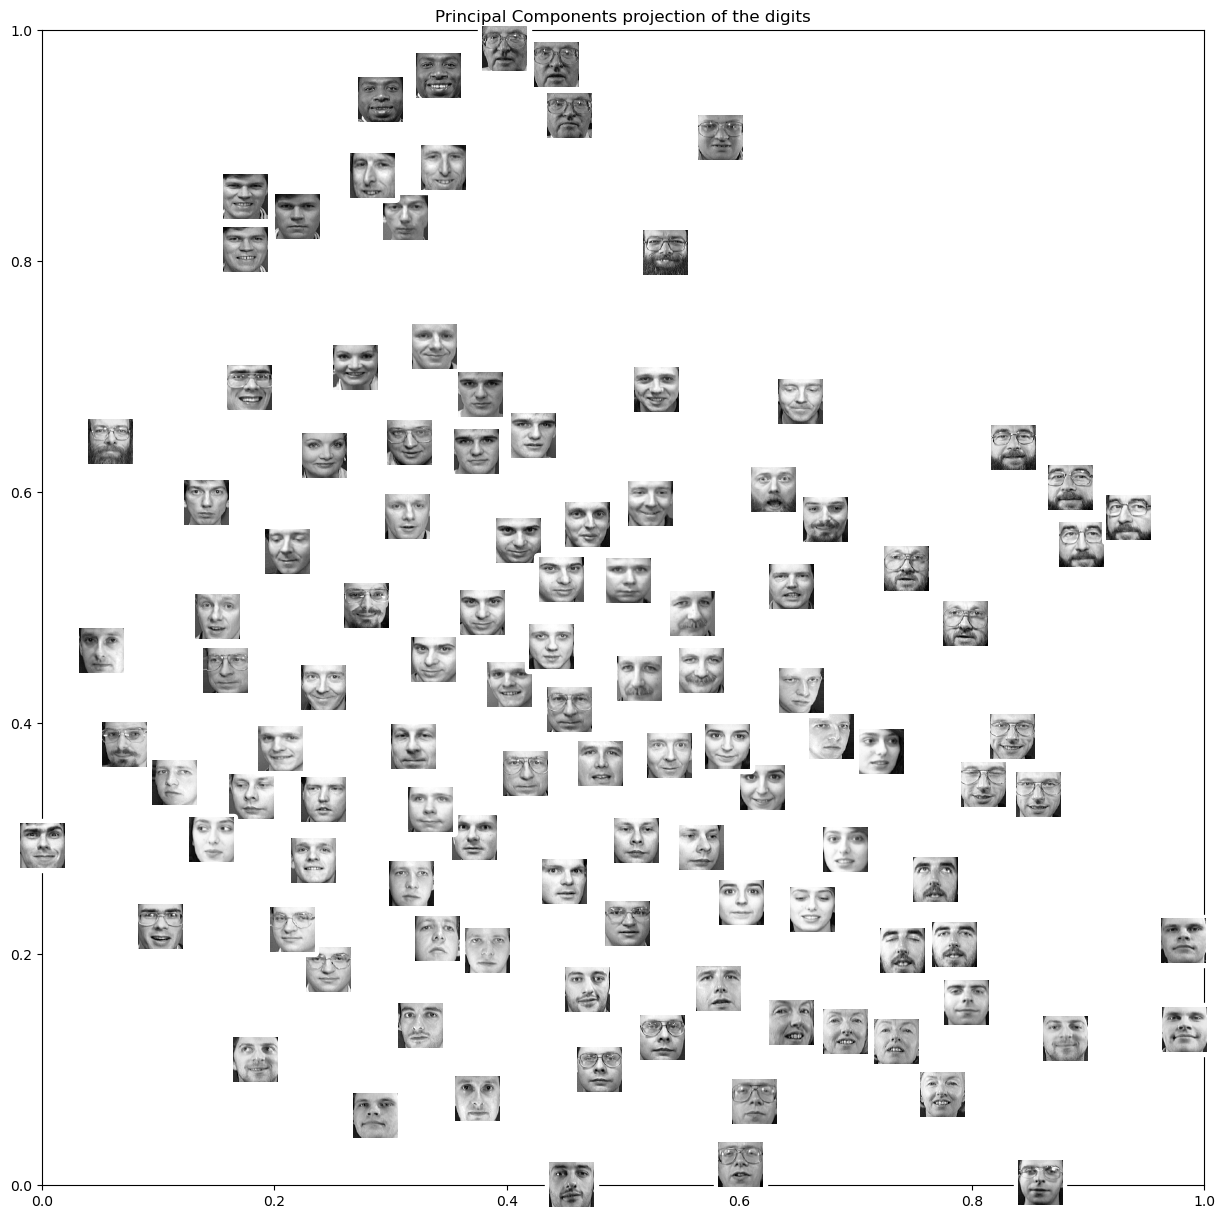

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
X = data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

# Cas 3 : t-SNE exemple
Prenons le cas de DataSet d'une boutique de ventes de vêtements


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

### Chargeons les données

In [28]:
# load dataset
data = datasets.fetch_openml(
    'Fashion-MNIST',
    version=1,
    return_X_y=True
)
# data returns a tuple (features, target)
features, target = data
target = target.astype(int)

/home/fouba/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Decoupons les données sous forme d'image

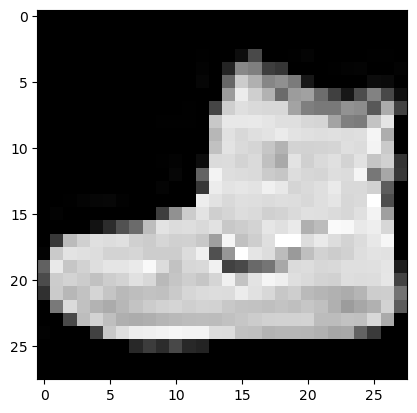

In [29]:
# reshape the features for plotting image
image = features.iloc[0].values.reshape(28, 28)
plt.imshow(image, cmap='gray')

# Appliquons le -SNE

In [32]:
# dimensionality reduction using t-SNE
tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(features[:30000])
# transformed_data is a 2D numpy array of shape (30000, 2)

In [33]:
# create dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((mnist_tr, 
                                            target.iloc[:30000])))
# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

/tmp/ipykernel_5107/3250427768.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cps_df.loc[:, 'target'] = cps_df.target.astype(int)


,CP1,CP2,target
0,-44.081924,65.925591,9
1,61.260559,-59.758316,0
2,-0.741912,-24.796646,0
3,9.082579,-29.057386,3
4,1.743131,-52.152168,0


In [34]:
clothes_map = {0:'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle Boot'}
# map targets to actual clothes for plotting
cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)

In [ ]:
cps_df.target.value_counts().plot(kind='bar')

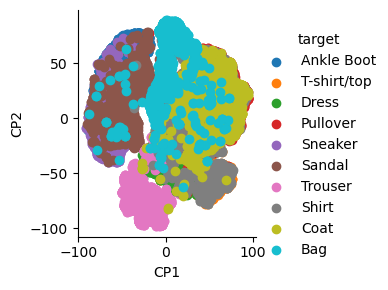

In [10]:
grid = sns.FacetGrid(cps_df, hue="target")
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()